In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols= ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df= pd.read_csv('/content/magic04.data',names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [4]:
df['class'] = (df['class'] == "g").astype(int)

In [5]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [6]:
# we will predicting the future values of class
#supervised
#quantitative,qulaitative,supervise,unsupervised,reinforcement,contionous,discrete,featurevector,classification-binar&,multiple,regression-rise and fall,training,train,validation(Reality chcek after validation),test,metrics -loss(Diifference between prediction and actual values)(should be less),
#l1 loss = sum(|yreal -ypredicted|) , l2 loss = sum(l1 loss)^2
#accuracy,
len(df)

19020

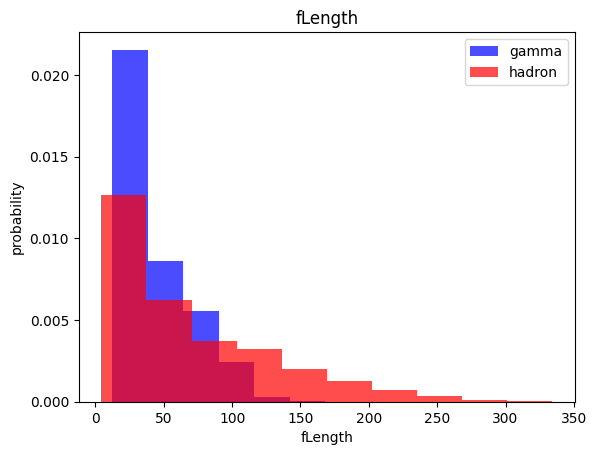

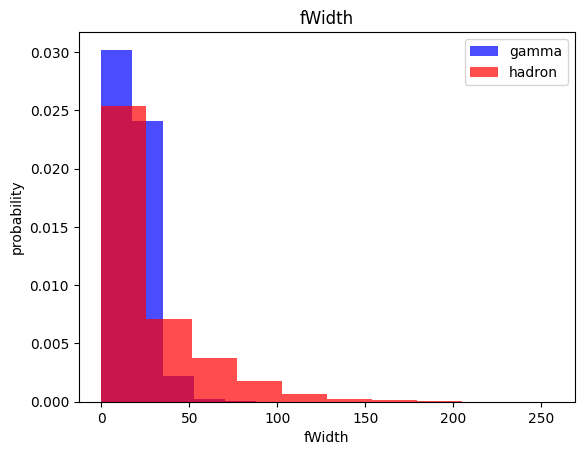

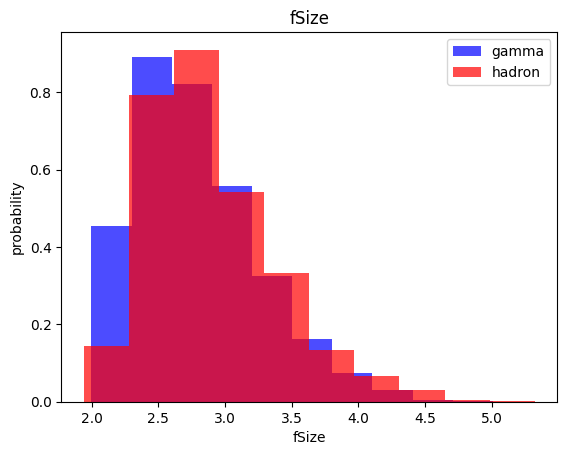

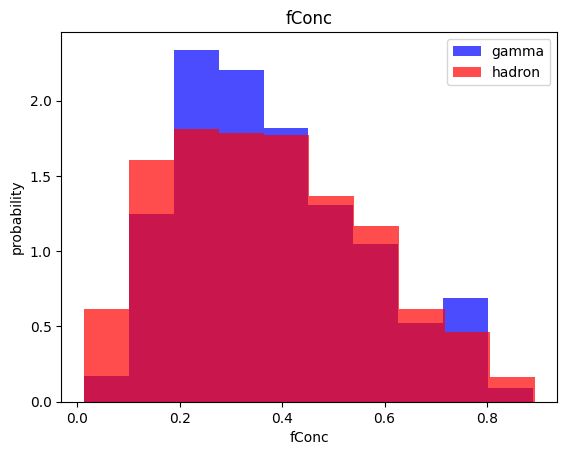

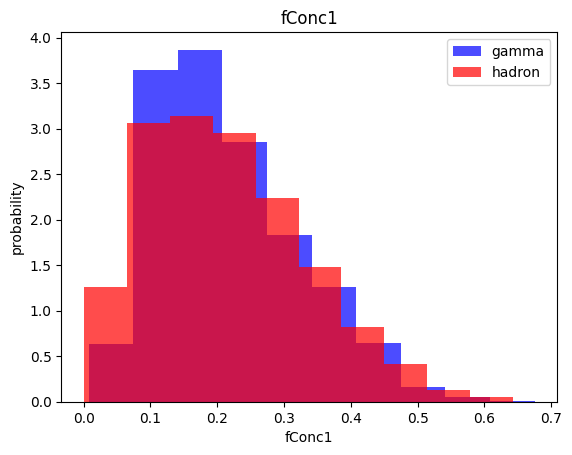

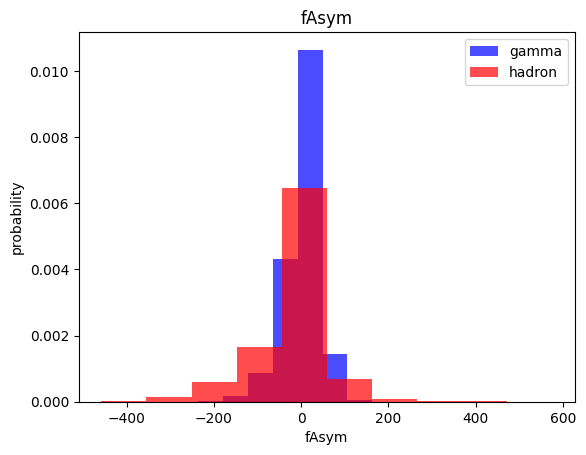

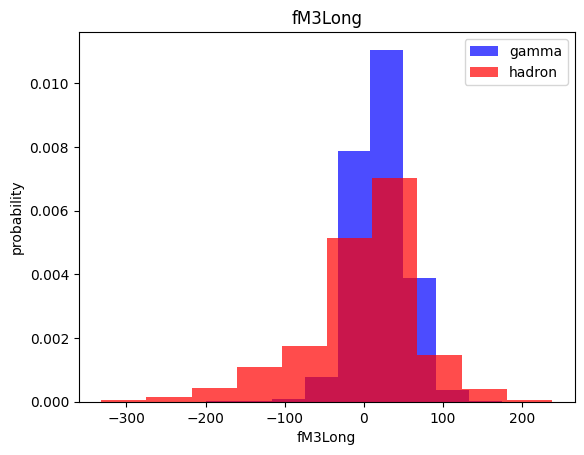

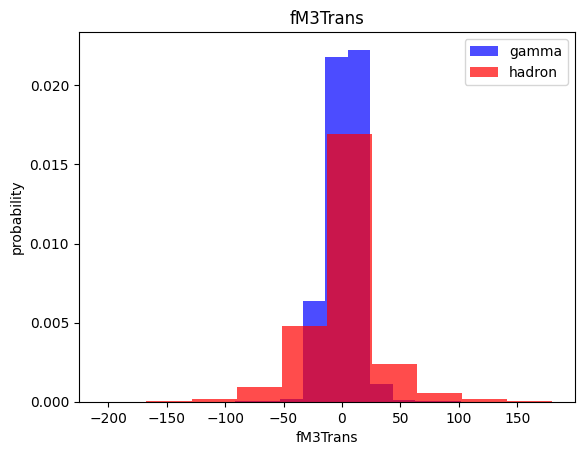

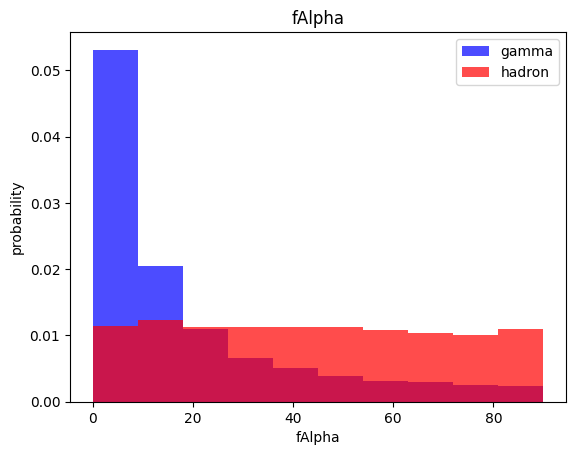

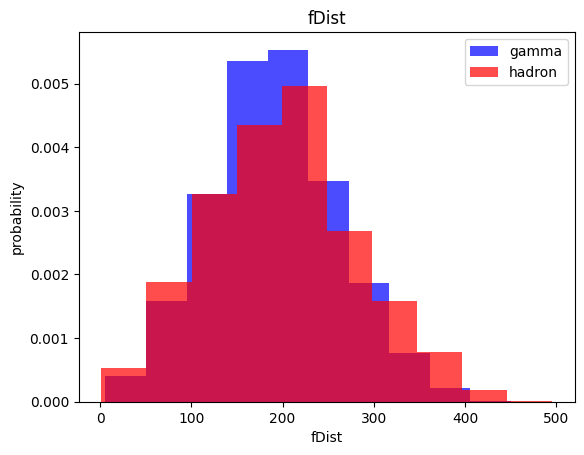

In [7]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color = 'blue', label = 'gamma',alpha = 0.7,density = True)
  plt.hist(df[df['class']==0][label],color = 'red', label = 'hadron',alpha = 0.7,density = True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("probability")
  plt.legend()
  plt.show()

In [8]:
train,validation,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [9]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


In [10]:
train, x_train, y_train =scale_dataset(train,oversample = True)

In [11]:

sum(y_train == 1)

7329

In [12]:
len(y_train)

14658

In [13]:
validation, x_validation, y_validation =scale_dataset(validation,oversample = False)
test, x_test, y_test =scale_dataset(test,oversample = True)

**KNN**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [16]:
y_pred = knn_model.predict(x_test)

In [17]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      2458
           1       0.79      0.88      0.83      2458

    accuracy                           0.82      4916
   macro avg       0.83      0.82      0.82      4916
weighted avg       0.83      0.82      0.82      4916



Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [21]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.42      0.55      2458
           1       0.61      0.90      0.73      2458

    accuracy                           0.66      4916
   macro avg       0.71      0.66      0.64      4916
weighted avg       0.71      0.66      0.64      4916



Log regression


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr_model = LogisticRegression()

In [24]:
lr_model = lr_model.fit(x_train,y_train)

In [25]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2458
           1       0.78      0.83      0.80      2458

    accuracy                           0.80      4916
   macro avg       0.80      0.80      0.79      4916
weighted avg       0.80      0.80      0.79      4916



**SVM**

In [26]:
from sklearn.svm import SVC

In [27]:
model_svc = SVC()

In [28]:
model_svc = model_svc.fit(x_train,y_train)

In [29]:
y_pred = model_svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      2458
           1       0.83      0.91      0.87      2458

    accuracy                           0.86      4916
   macro avg       0.87      0.86      0.86      4916
weighted avg       0.87      0.86      0.86      4916



**Neural Networks**


In [30]:
#sumation(x*w),bais - > activation function(without activation the network becomes linear )


In [31]:
import tensorflow as tf

In [32]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [45]:
def train_model(x_train,y_train,num_nodes,dropout_prob, lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ])
  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',metrics = ['accuracy'])
  history = nn_model.fit(
    x_train,y_train, epochs = epochs , batch_size = batch_size, validation_split = 0.2,
    verbose=0 )
  return nn_model,history

16 nodes, dropout 0, lr 0.1, batch size 32


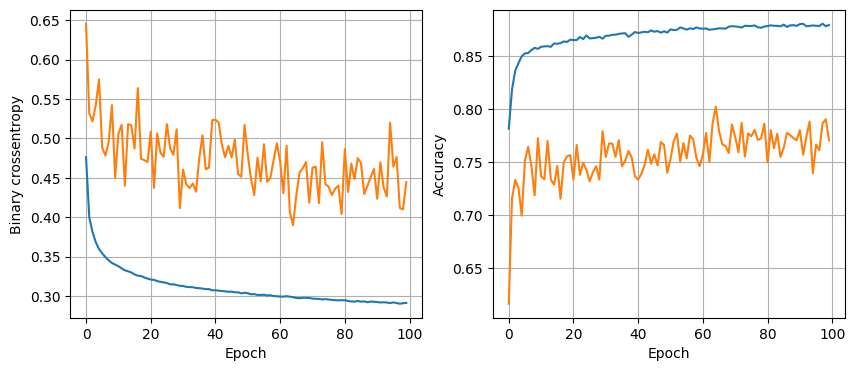

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.1, batch size 64


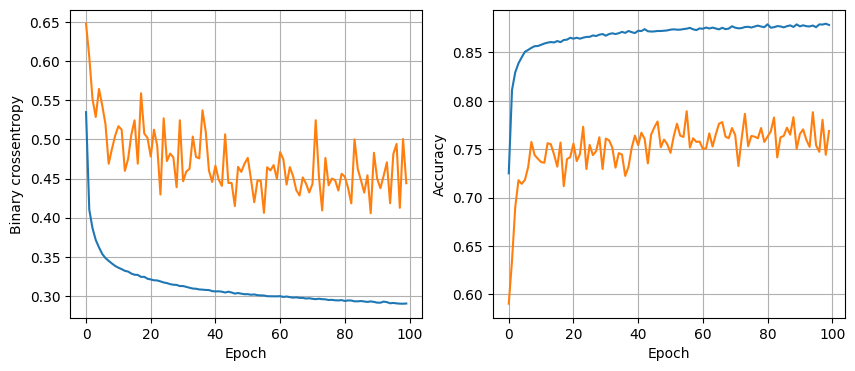

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.1, batch size 128


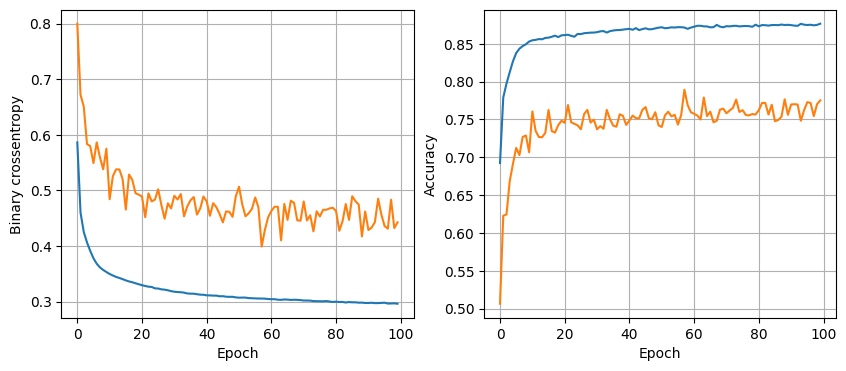

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8701
16 nodes, dropout 0, lr 0.05, batch size 32


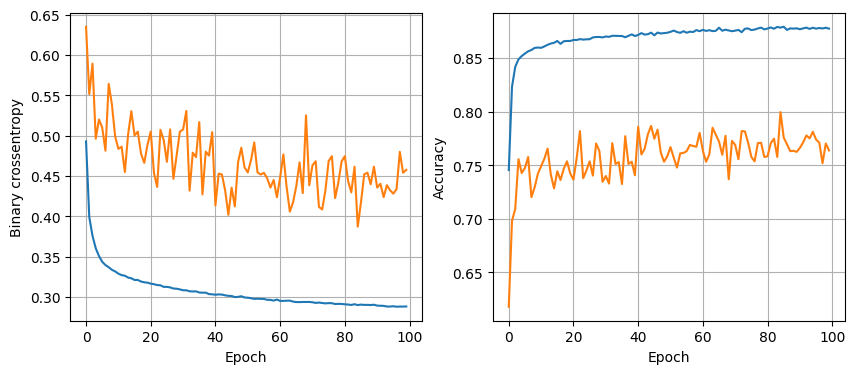

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.05, batch size 64


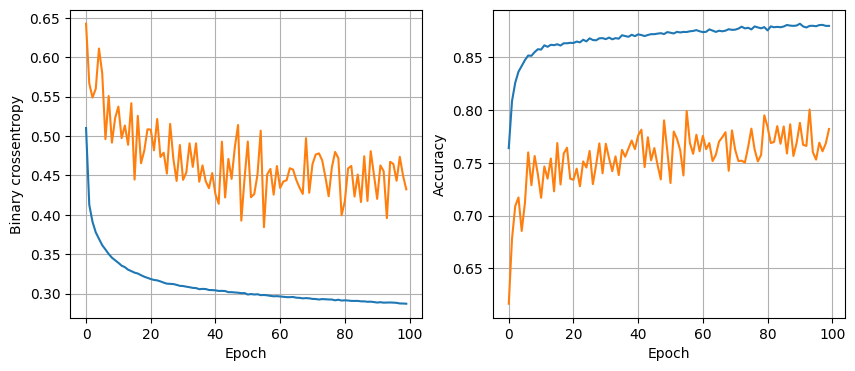

119/119 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.05, batch size 128


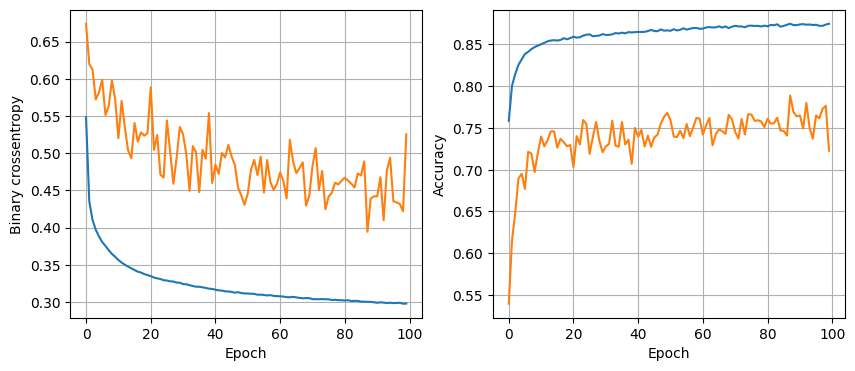

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8686
16 nodes, dropout 0, lr 0.001, batch size 32


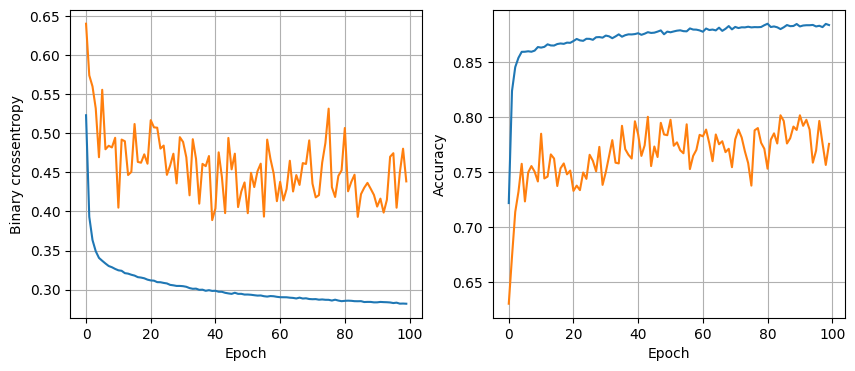

119/119 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.001, batch size 64


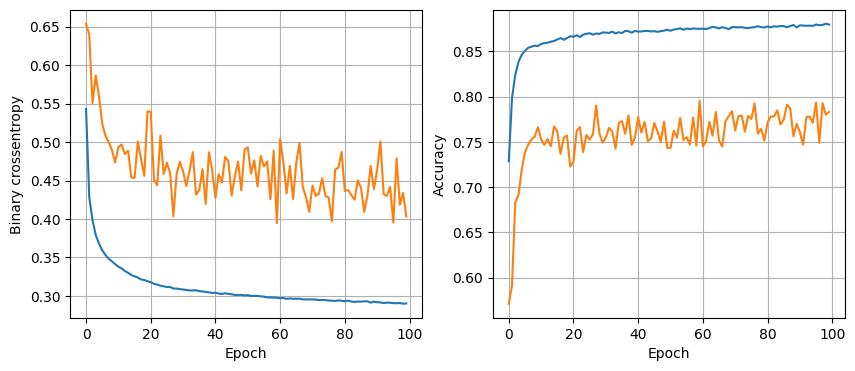

119/119 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8601
16 nodes, dropout 0, lr 0.001, batch size 128


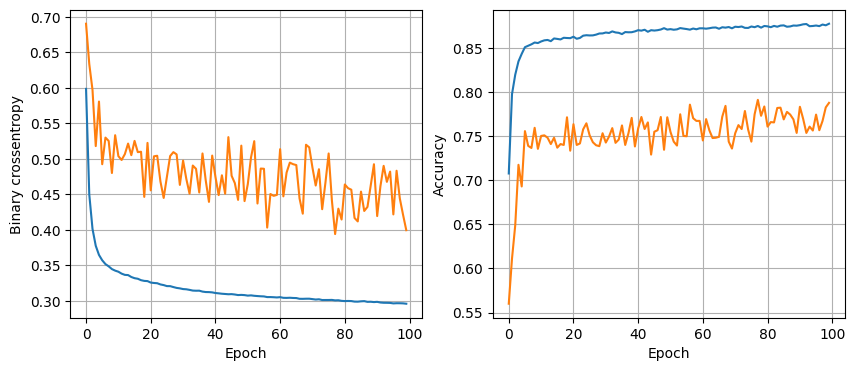

119/119 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.1, batch size 32


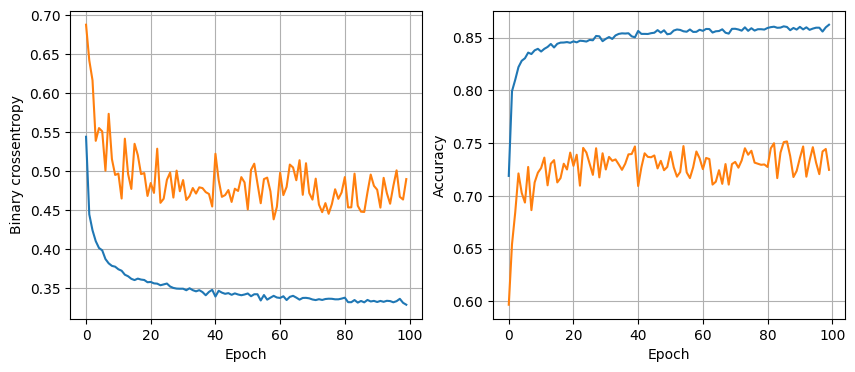

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.1, batch size 64


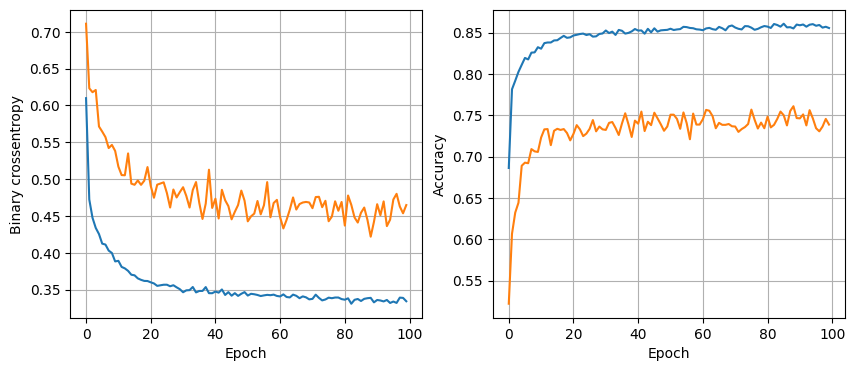

119/119 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.1, batch size 128


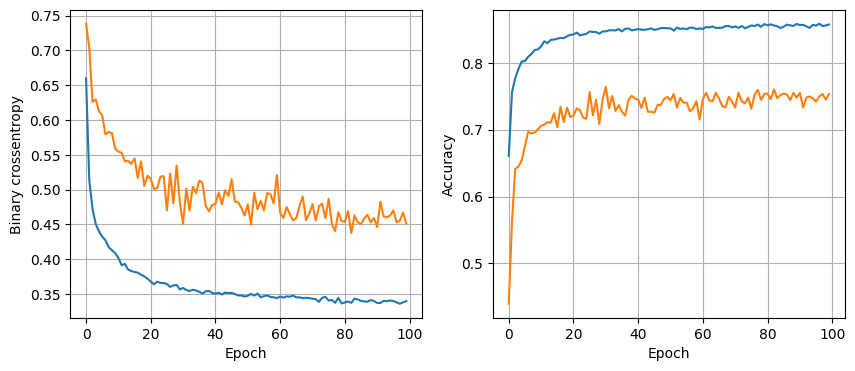

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.05, batch size 32


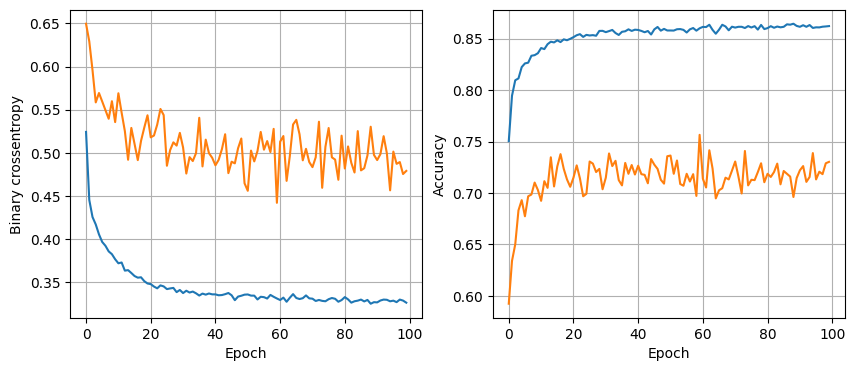

119/119 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.05, batch size 64


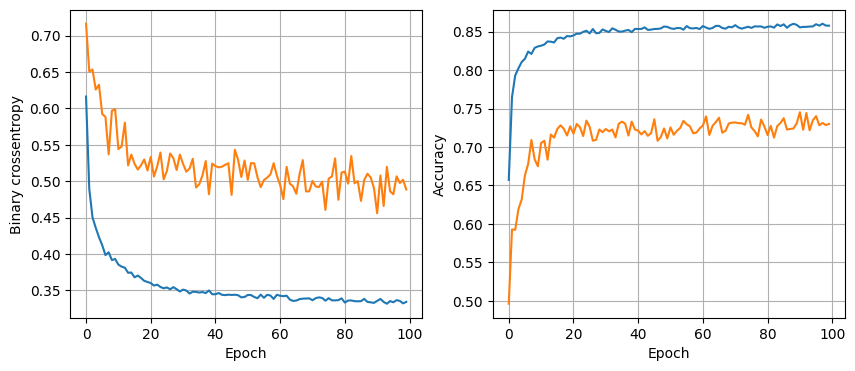

119/119 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.05, batch size 128


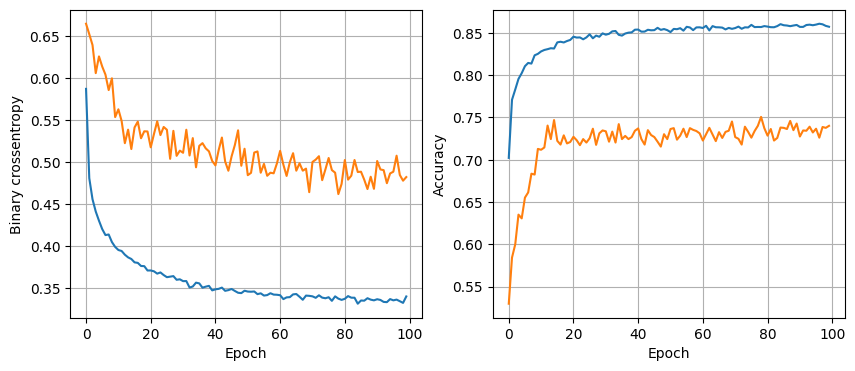

119/119 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.001, batch size 32


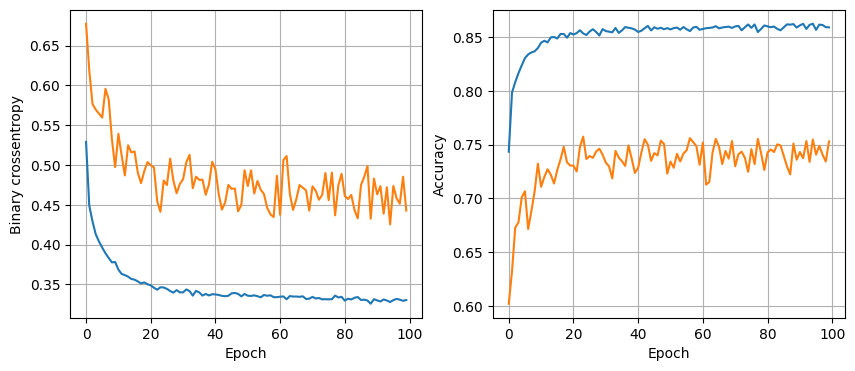

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.001, batch size 64


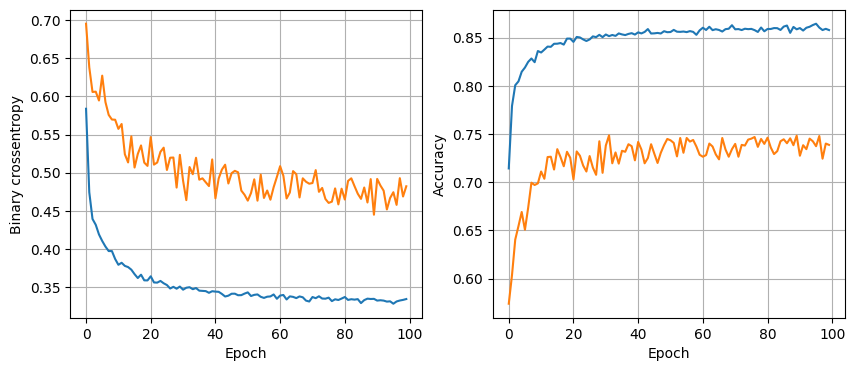

119/119 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8707
16 nodes, dropout 0.2, lr 0.001, batch size 128


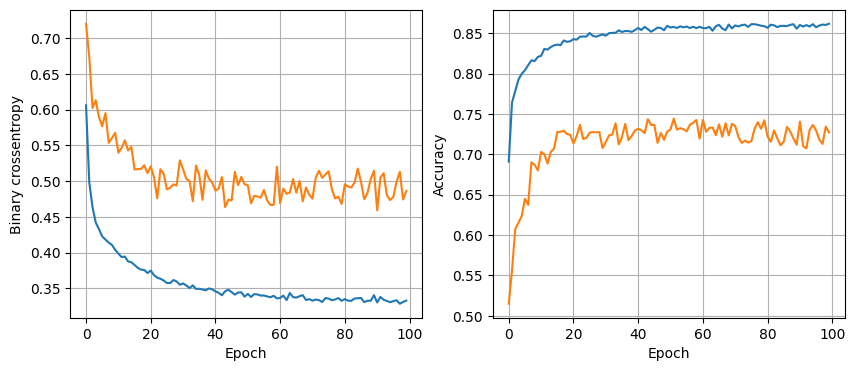

119/119 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.1, batch size 32


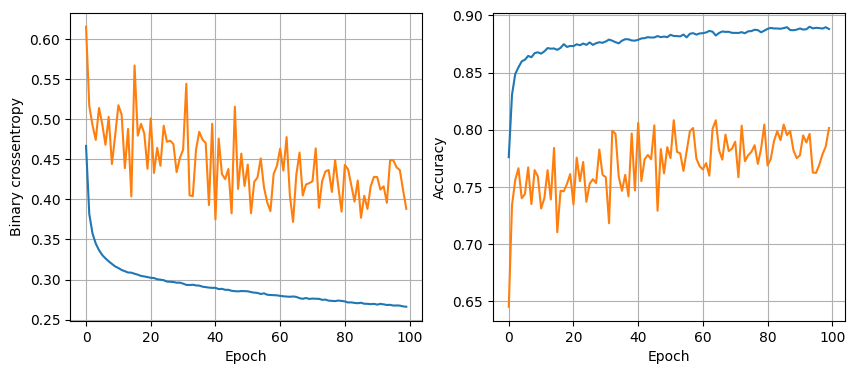

119/119 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8672
32 nodes, dropout 0, lr 0.1, batch size 64


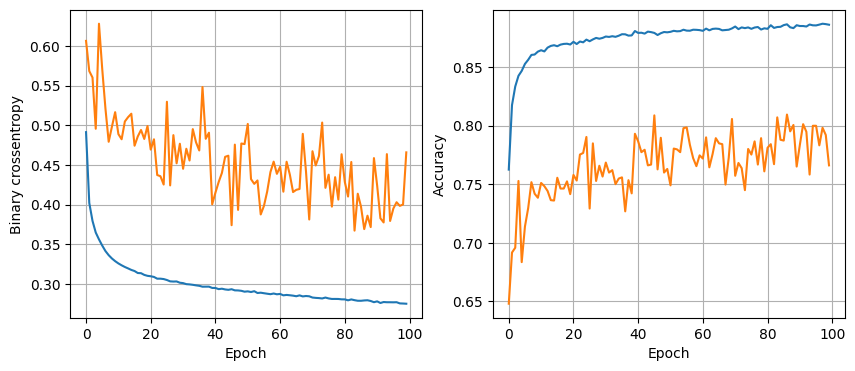

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.1, batch size 128


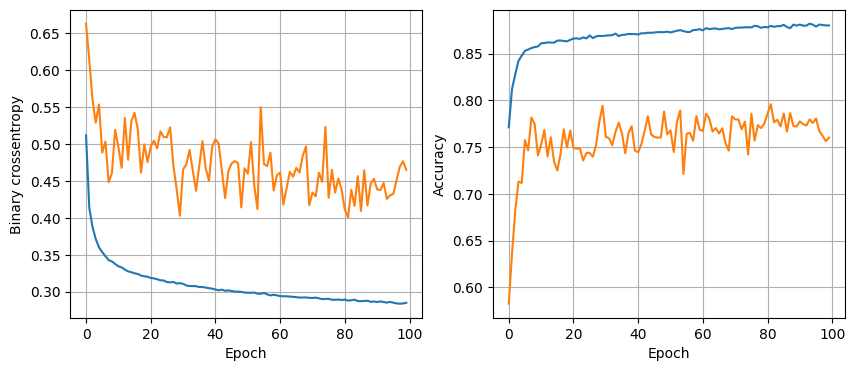

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.05, batch size 32


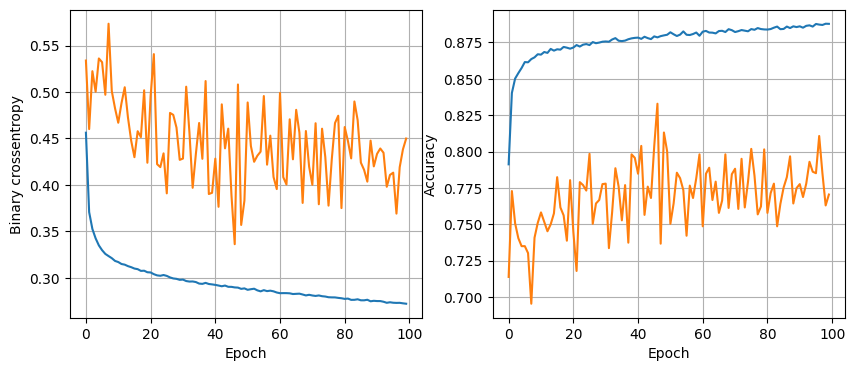

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8707
32 nodes, dropout 0, lr 0.05, batch size 64


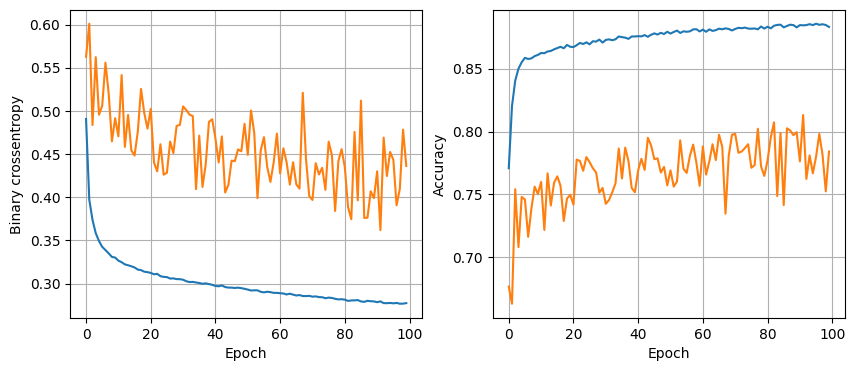

119/119 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.05, batch size 128


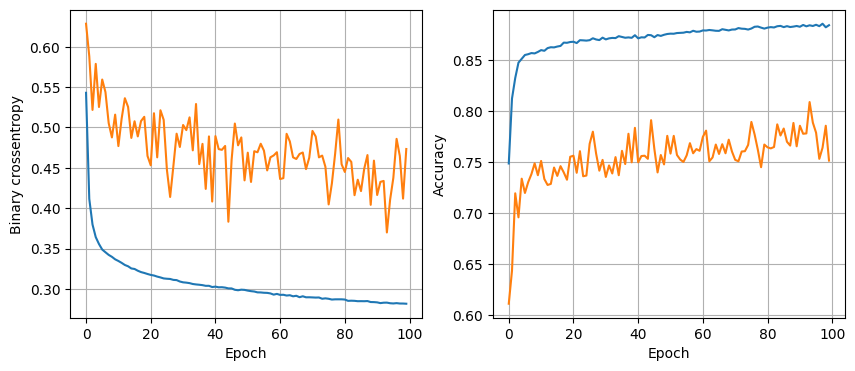

119/119 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.001, batch size 32


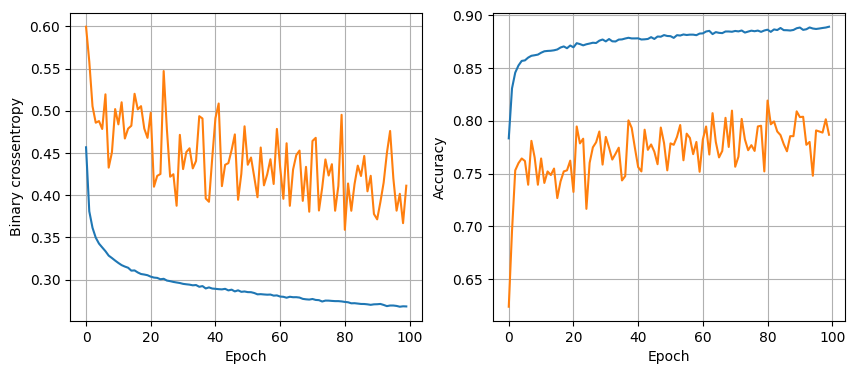

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.001, batch size 64


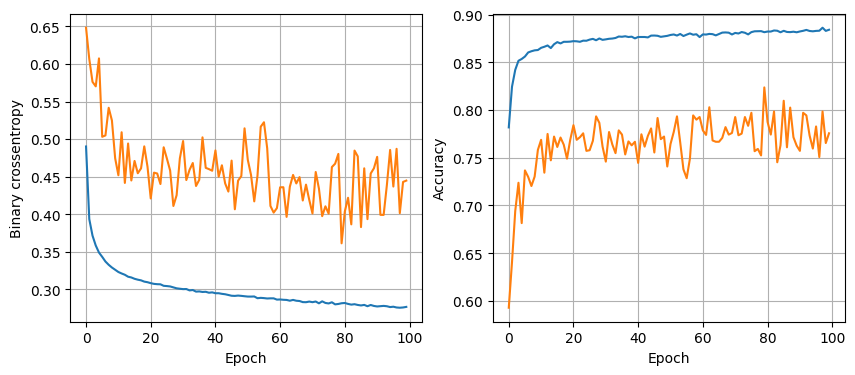

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.001, batch size 128


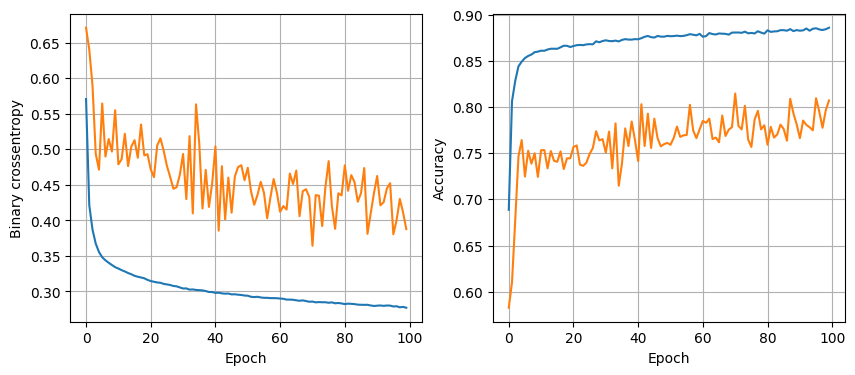

119/119 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8633
32 nodes, dropout 0.2, lr 0.1, batch size 32


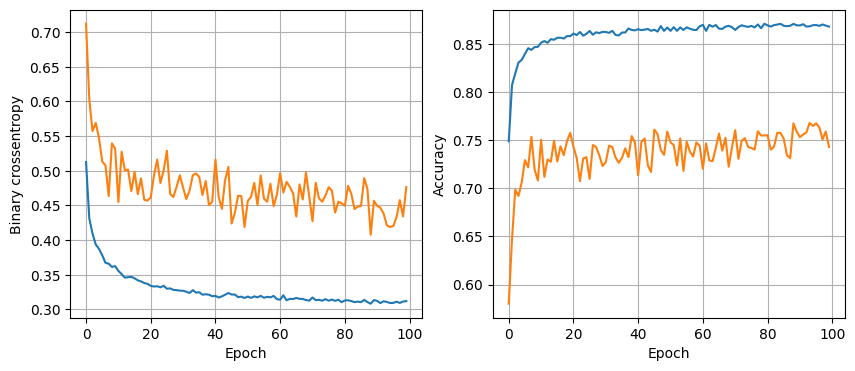

119/119 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.1, batch size 64


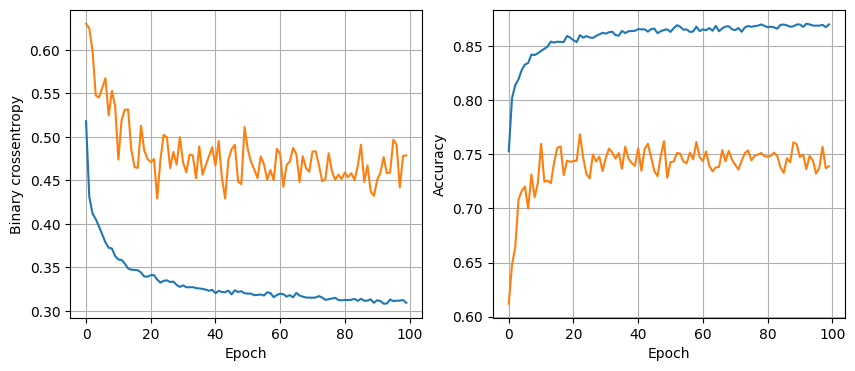

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.1, batch size 128


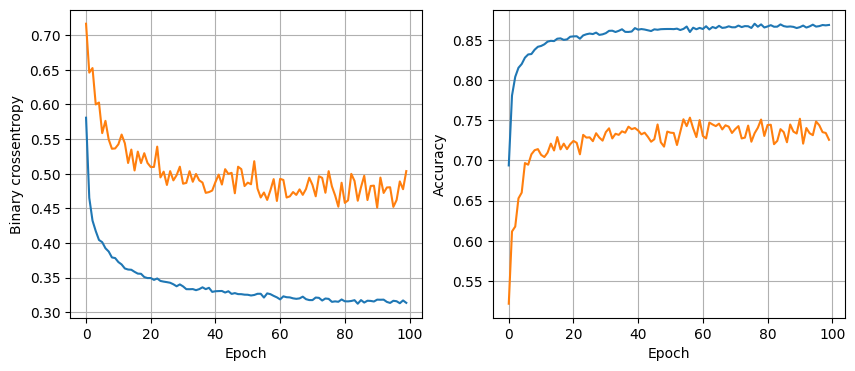

119/119 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.05, batch size 32


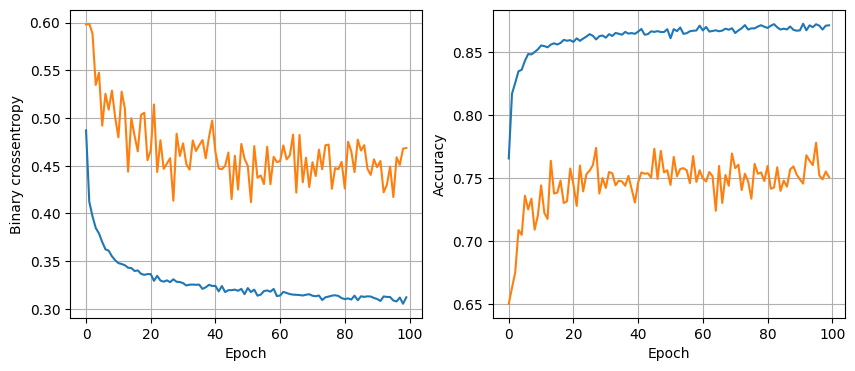

119/119 [==============================] - 0s 3ms/step - loss: 0.2991 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.05, batch size 64


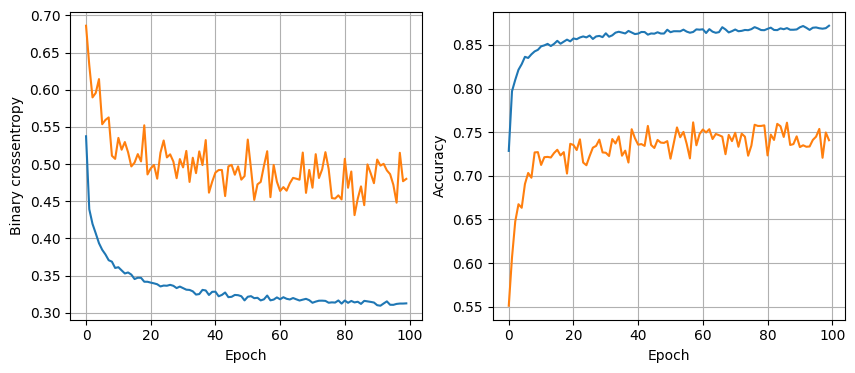

119/119 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8733
32 nodes, dropout 0.2, lr 0.05, batch size 128


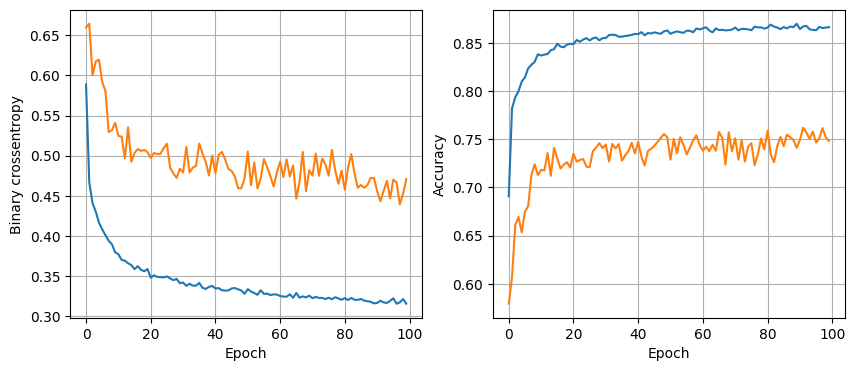

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.001, batch size 32


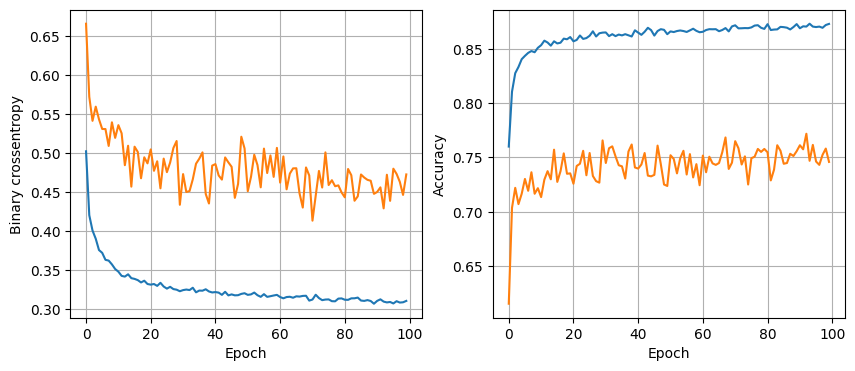

119/119 [==============================] - 0s 3ms/step - loss: 0.2977 - accuracy: 0.8754
32 nodes, dropout 0.2, lr 0.001, batch size 64


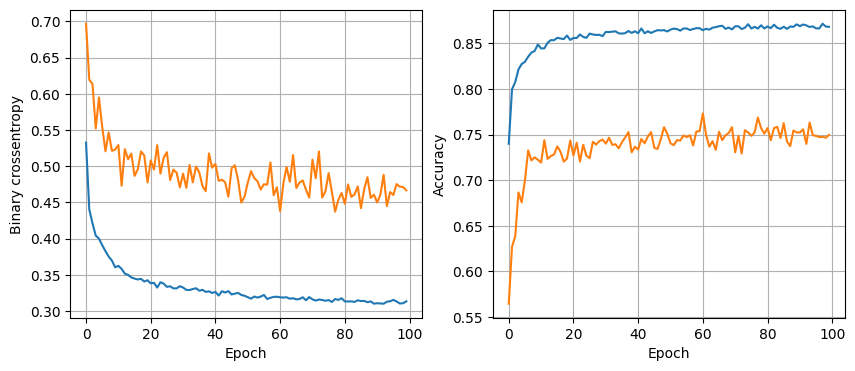

119/119 [==============================] - 0s 3ms/step - loss: 0.3003 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.001, batch size 128


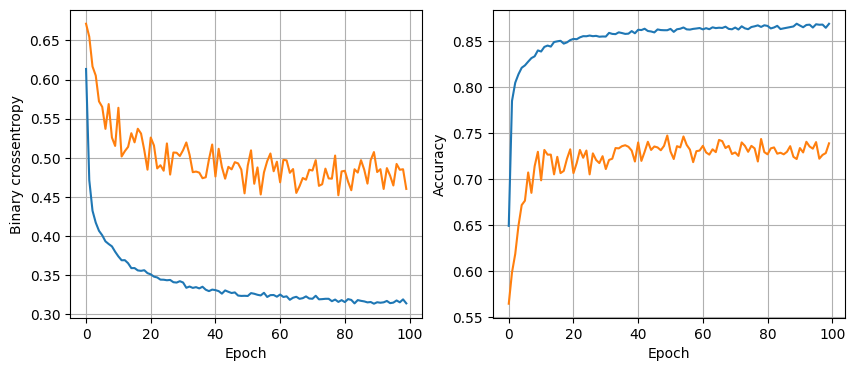

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8767
64 nodes, dropout 0, lr 0.1, batch size 32


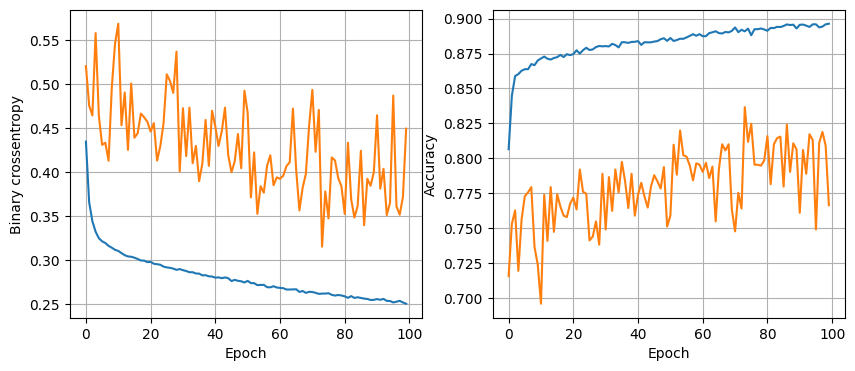

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.1, batch size 64


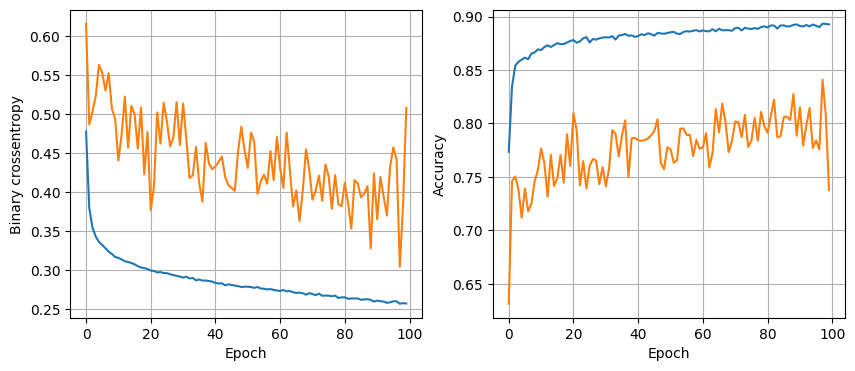

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.1, batch size 128


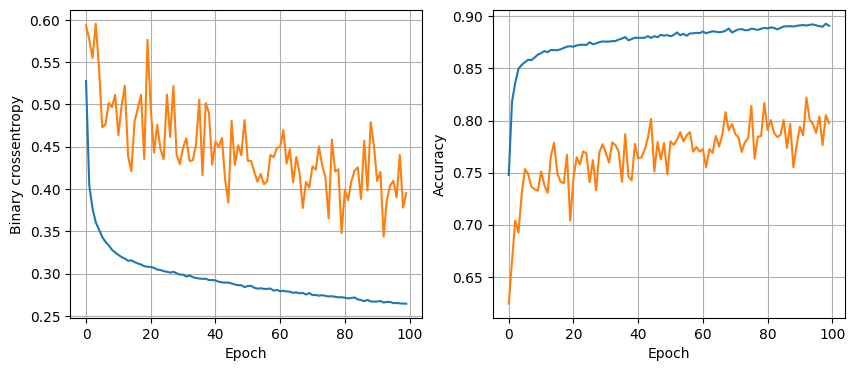

119/119 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8630
64 nodes, dropout 0, lr 0.05, batch size 32


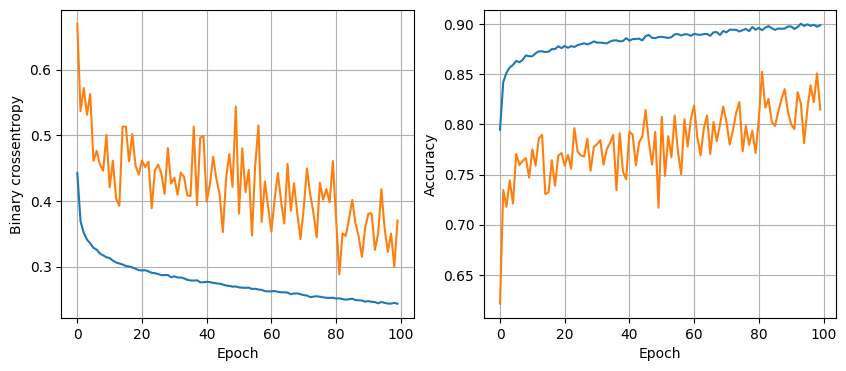

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.05, batch size 64


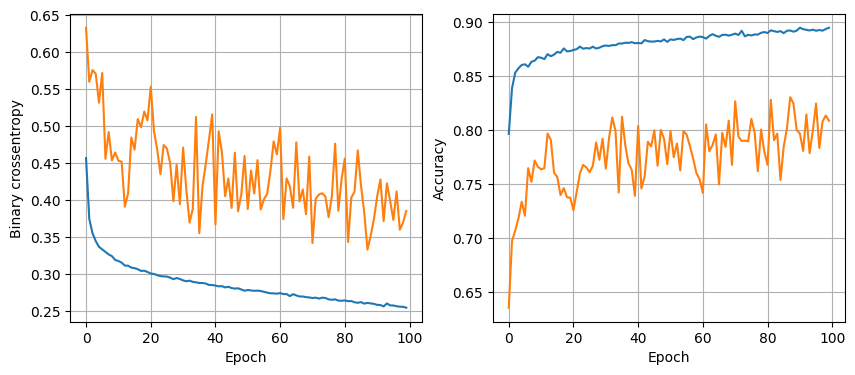

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.05, batch size 128


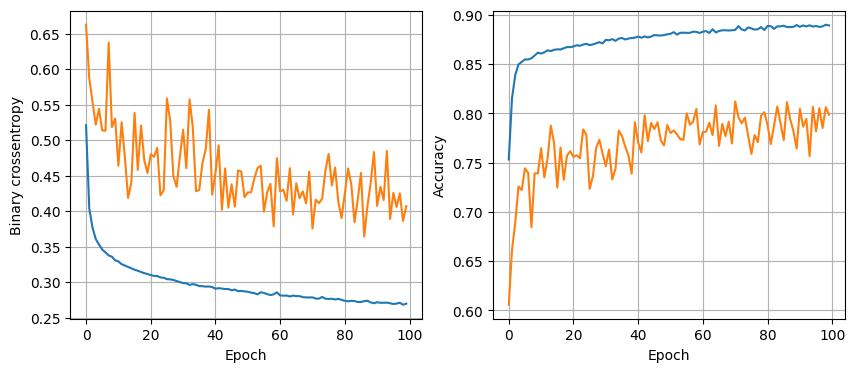

119/119 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.8644
64 nodes, dropout 0, lr 0.001, batch size 32


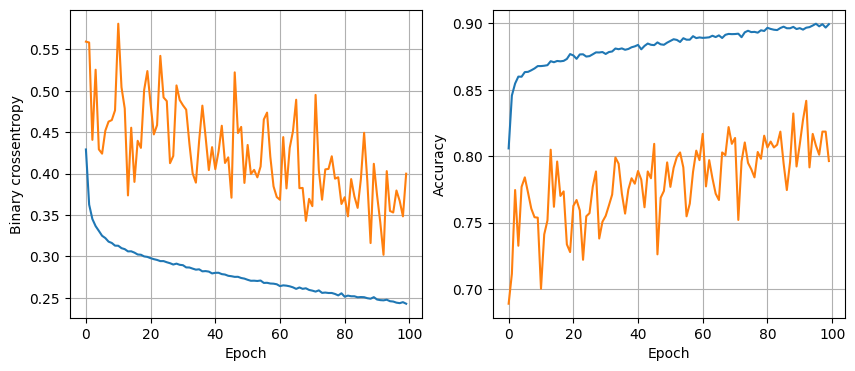

119/119 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.001, batch size 64


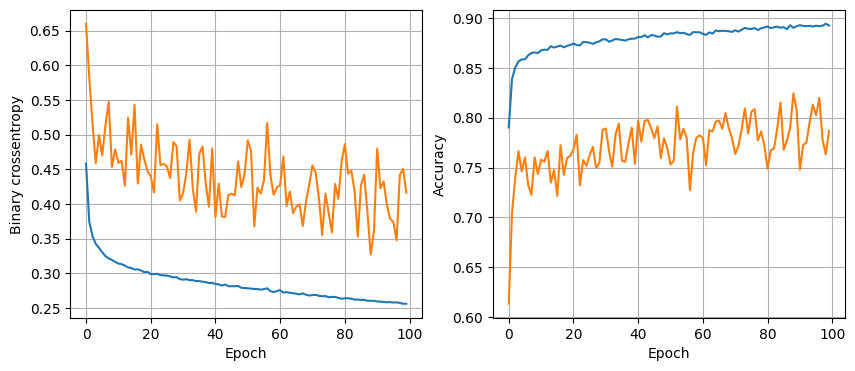

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8667
64 nodes, dropout 0, lr 0.001, batch size 128


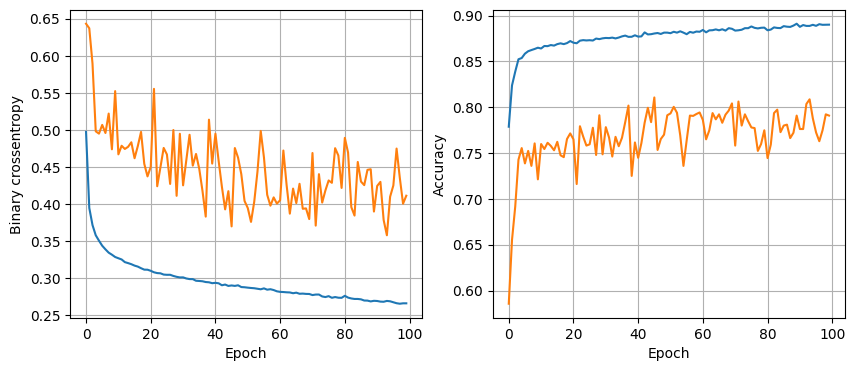

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.1, batch size 32


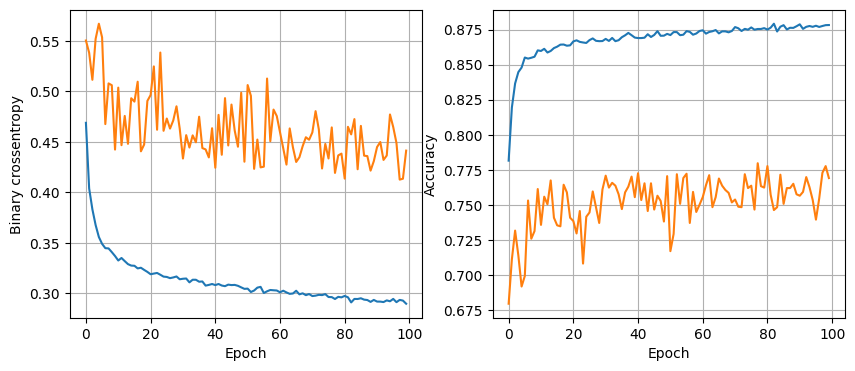

119/119 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8699
64 nodes, dropout 0.2, lr 0.1, batch size 64


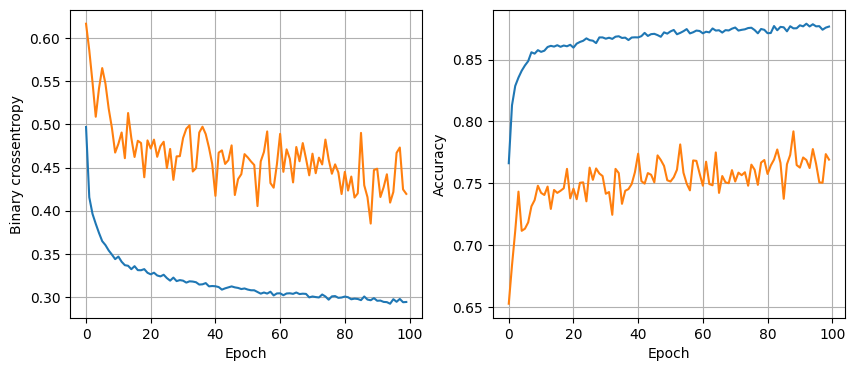

119/119 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.1, batch size 128


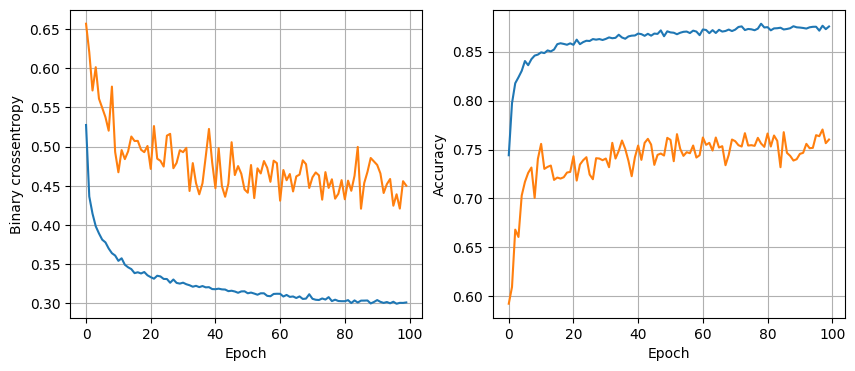

119/119 [==============================] - 0s 3ms/step - loss: 0.2958 - accuracy: 0.8743
64 nodes, dropout 0.2, lr 0.05, batch size 32


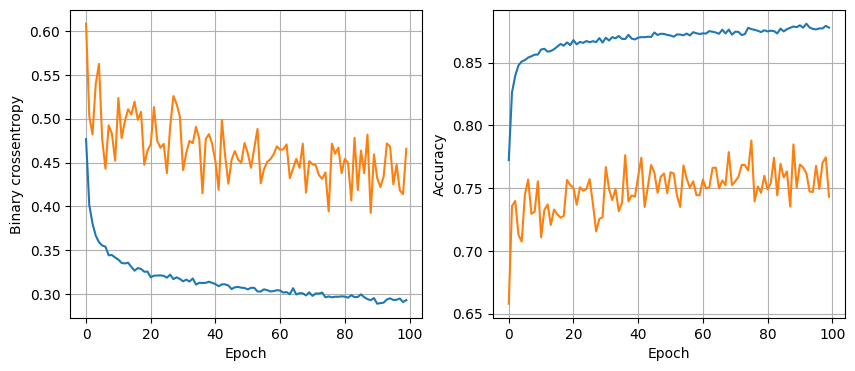

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.05, batch size 64


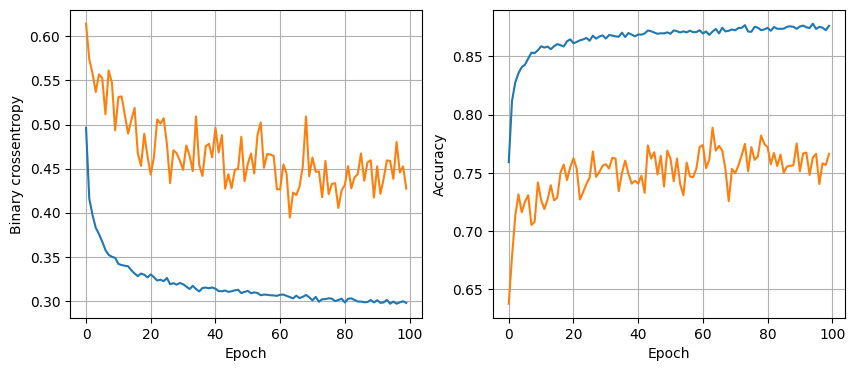

119/119 [==============================] - 0s 3ms/step - loss: 0.3019 - accuracy: 0.8699
64 nodes, dropout 0.2, lr 0.05, batch size 128


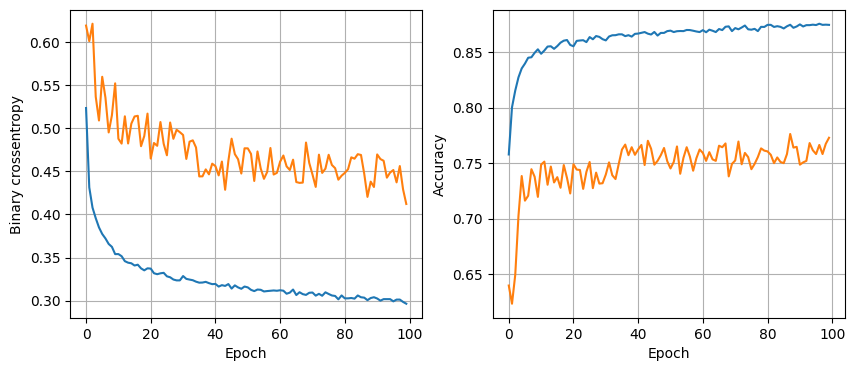

119/119 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8672
64 nodes, dropout 0.2, lr 0.001, batch size 32


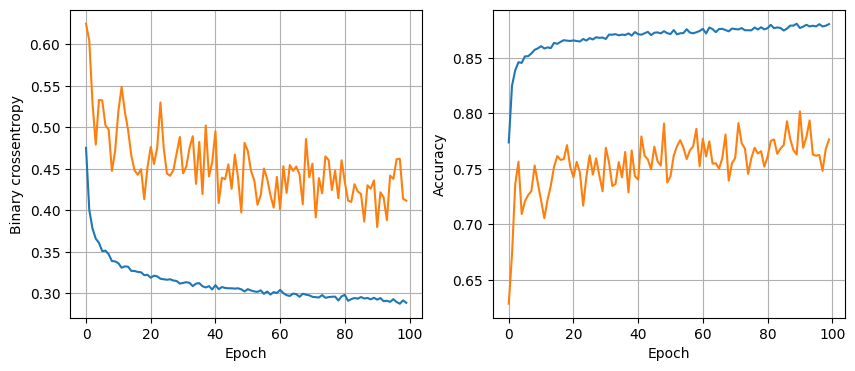

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8738
64 nodes, dropout 0.2, lr 0.001, batch size 64


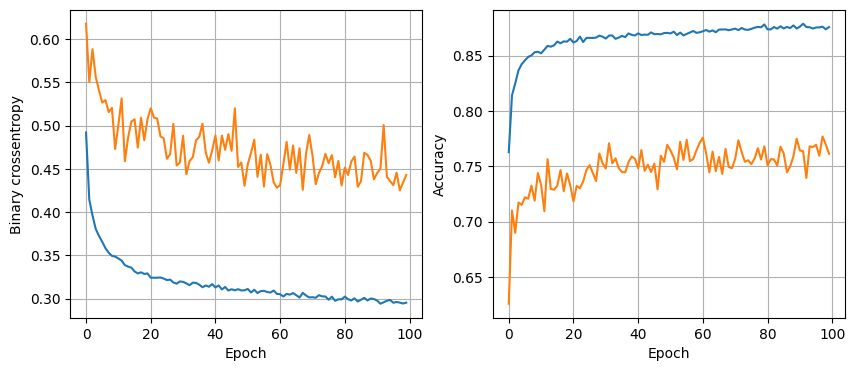

119/119 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.001, batch size 128


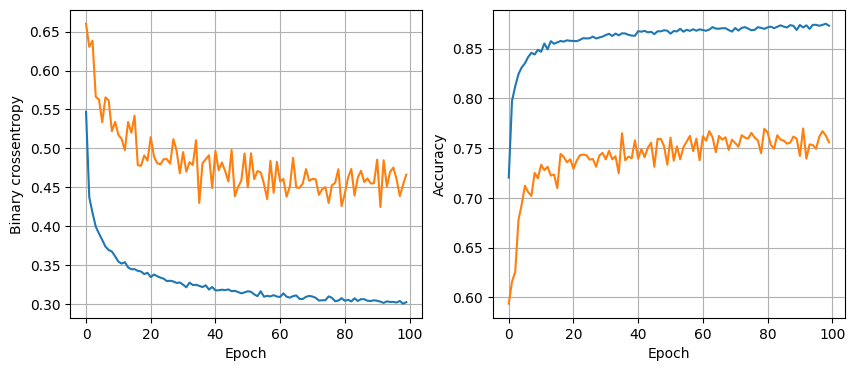

119/119 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8733


In [48]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1,0.05,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model,history = train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(x_validation,y_validation)[0]
        if val_loss < least_val_loss:
          least_val_loss = least_val_loss
          least_loss_model = model


In [50]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

154/154 [==============================] - 0s 2ms/step


In [51]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2458
           1       0.80      0.95      0.87      2458

    accuracy                           0.85      4916
   macro avg       0.87      0.85      0.85      4916
weighted avg       0.87      0.85      0.85      4916

